In [ ]:
import os
import sys
import glob
import numpy as np
import pandas as pd

import cartopy.feature as cf
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil')

## Convert CPTEC data from rdy to Final

In [3]:
obs_list = glob.glob(os.path.join(dir_base,'OBS_CPTEC','rdy','*.csv'))
obs_list = sorted(obs_list)
obs_len = len(obs_list)
print(f'NUmber of files: {obs_len}')

NUmber of files: 3586


In [39]:
FILE, LAT, LON, ALT, MAX, MEAN = [], [], [], [], [], []

for nn in range(obs_len):

    data = pd.read_csv(obs_list[nn])

    filename = obs_list[nn].split('/')[-1]

    la_ = np.unique(data.lat.values)
    lat_ = float(la_[~np.isnan(la_)][0].round(2))

    lo_ = np.unique(data.lon.values)
    lon_ = float(lo_[~np.isnan(lo_)][0].round(2))

    al = np.unique(data.alt.values)
    alt_ = float(al[~np.isnan(al)][0].round(2))

    max_ = np.nanmax(data.r.values).round(2)
    mean_ = np.nanmean(data.r.values).round(2)

    FILE.append(filename)
    LAT.append(lat_)
    LON.append(lon_)
    ALT.append(alt_)
    MAX.append(max_)
    MEAN.append(mean_)

    prec = data.r.values
    time_vector = data.date.values
    
    DF = pd.DataFrame({'time':time_vector, 'pre':prec})
    output = os.path.join(dir_base,'OBS_CPTEC','final',filename)
    DF.to_csv(output,header=True,index=False)

INFO = pd.DataFrame({'File':FILE, 'Lat':LAT, 'Lon':LON, 'Alt':ALT, 'Max':MAX, 'Mean':MEAN})
INFO = INFO[(INFO.Lon<-33)&(INFO.Lat>=-55)&(INFO.Lat<=6)]
output = os.path.join(dir_base,'OBS_CPTEC','INFO_final.csv')
INFO.to_csv(output,header=True,index=False)

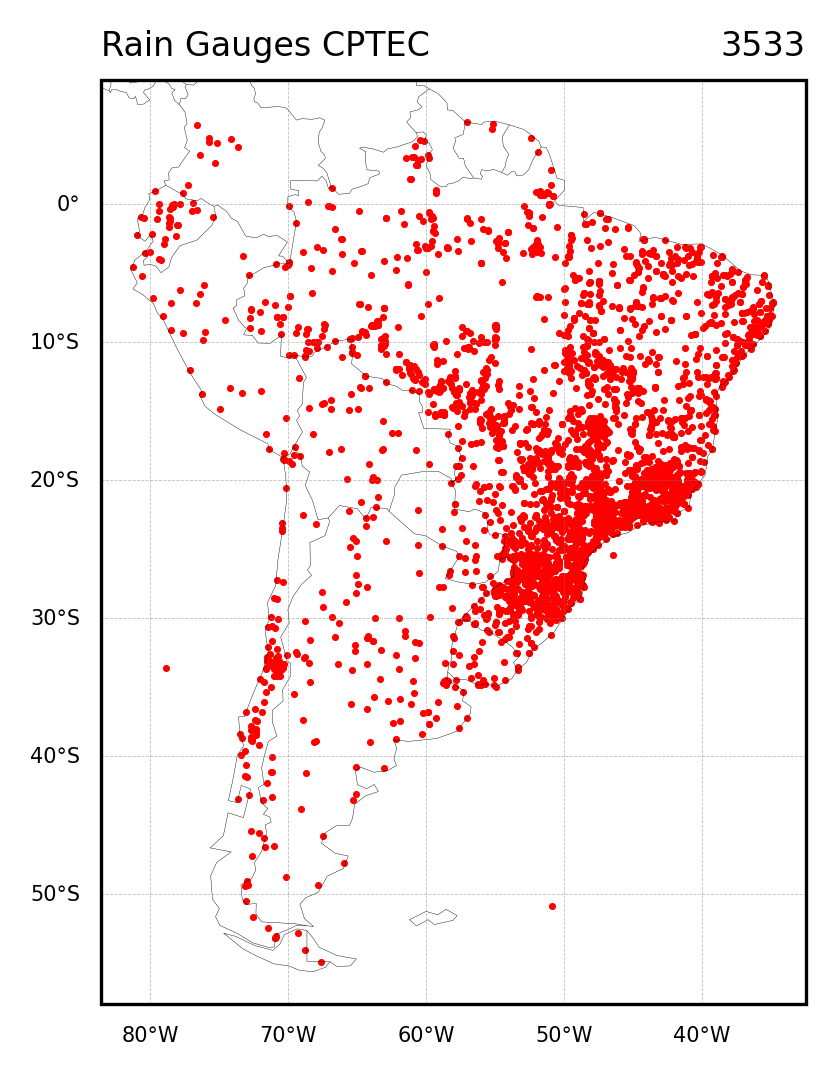

In [43]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

ax1.scatter(INFO.Lon,INFO.Lat,s=0.5,marker='o',color='r',transform=proj)
ax1.set_title('Rain Gauges CPTEC', fontsize=8, loc='left')
ax1.set_title(len(INFO), fontsize=8, loc='right')

ax1.set_facecolor('white')
fig.patch.set_alpha(0)